In [104]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
from lcapy import *
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import  EngFormatter

In [6]:
sys.path

['/home/erik/GitRepos/Resonators',
 '/home/erik/anaconda3/envs/py312/lib/python312.zip',
 '/home/erik/anaconda3/envs/py312/lib/python3.12',
 '/home/erik/anaconda3/envs/py312/lib/python3.12/lib-dynload',
 '',
 '/home/erik/anaconda3/envs/py312/lib/python3.12/site-packages']

In [2]:
sys.path.append(r'/home/erik/GitRepos/lcapy/doc/examples/tutorials/ivp')
sys.path

['/home/erik/GitRepos/Resonators',
 '/home/erik/anaconda3/envs/py312/lib/python312.zip',
 '/home/erik/anaconda3/envs/py312/lib/python3.12',
 '/home/erik/anaconda3/envs/py312/lib/python3.12/lib-dynload',
 '',
 '/home/erik/anaconda3/envs/py312/lib/python3.12/site-packages',
 '/home/erik/anaconda3/envs/py312/lib/python3.12/site-packages/setuptools/_vendor',
 '/home/erik/GitRepos/lcapy/doc/examples/tutorials/ivp']

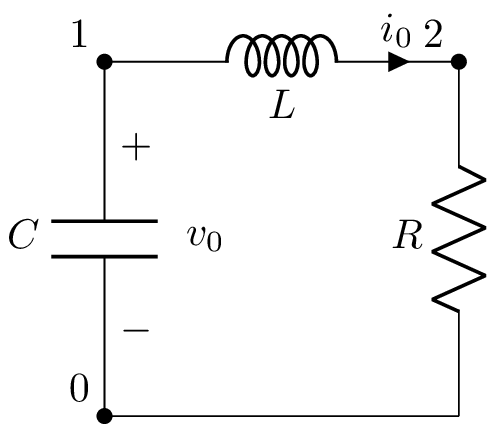

In [3]:
a = Circuit(r'/home/erik/GitRepos/lcapy/doc/examples/tutorials/ivp/circuit-RLC-ivp1.sch')
a.draw()

In [15]:
a.R.V(s)

⎛R⋅(L⋅i₀⋅s + v₀)⎞
⎜───────────────⎟
⎝       L       ⎠
─────────────────
   2   R⋅s    1  
  s  + ─── + ─── 
        L    C⋅L 

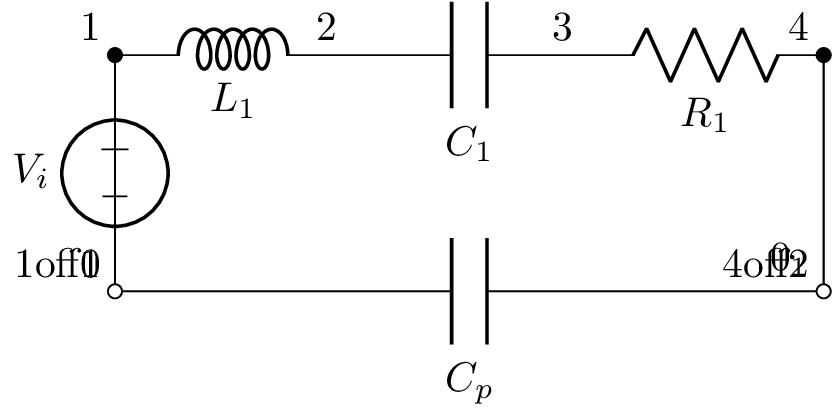

In [34]:
a = Circuit("""
Vi 1 0; down, 
L1 1 2; right, 
C1 2 3; right, 
R1 3 4; right, 
Cp 1 4; right, offset=-1,
W 4 0_1; down, 
; label_nodes=true, draw_nodes=connections""")
a.draw()

In [ ]:
a = Circuit("""
Vi 1 0; down, 
L1 1 2; down, offset = 1
C1 2 3; down, 
R1 3 0; down, 
Cp 1 0; right, offset=2,
; label_nodes=true, draw_nodes=connections""")
a.draw()

Distance conflict -0.30000000000000004 vs 0 in vertical graph for dummy between nodes start and (0_4), due to incompatible sizes


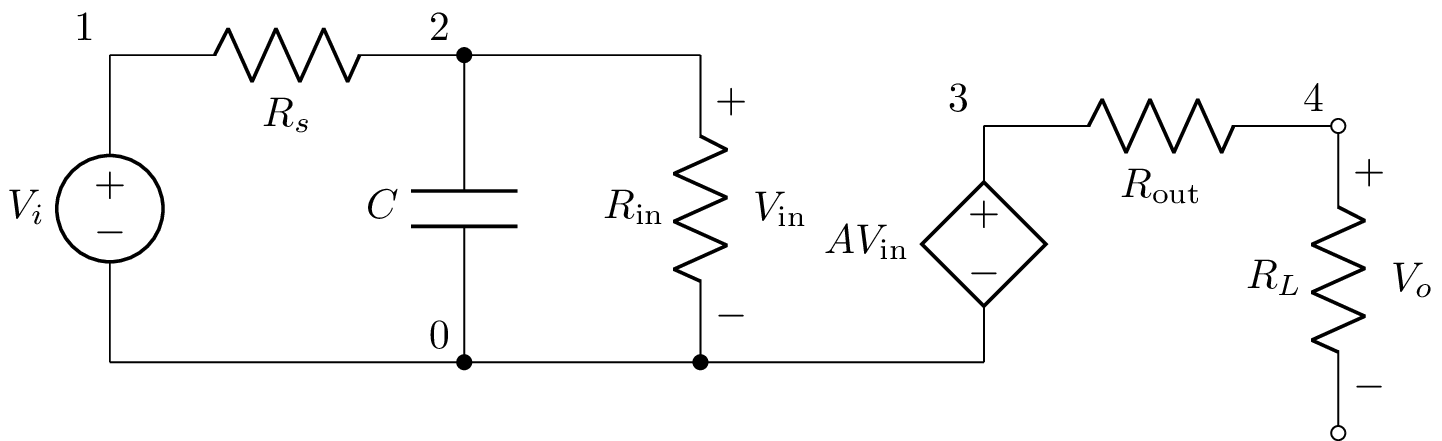

In [38]:
a = Circuit("""
Vi 1 0_1; down=1.3
Rs 1 2; right=1.5
C 2 0; down
W 0_1 0; right
W 0 0_2; right
Rin 2_2 0_2; down, v=V_{in}
W 2 2_2; right
E1 3 0_3 2 0 A; down, l=A V_{in}
Rout 3 4; right=1.5
RL 4 0_4; down=1.3, v=V_o
W 0_2 0_3; size=1.2
P1 4 0_4; down
; draw_nodes=connected""")
a.draw()

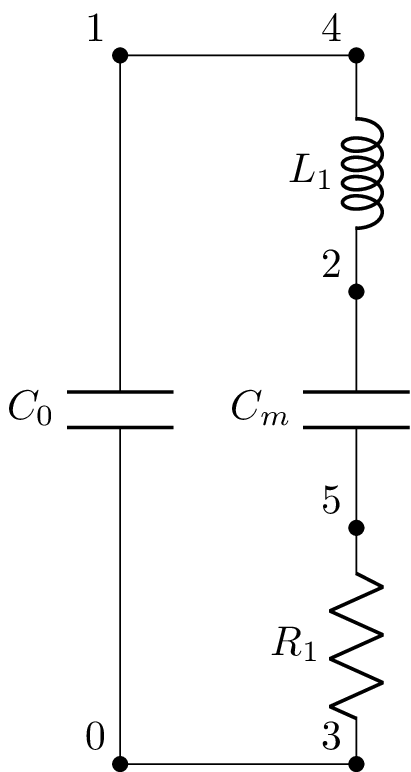

In [57]:


# Create a schematic
circuit = Circuit()

# Define the components
#circuit.add('V1 6 0; down')
#circuit.add('W 6 1;')
circuit.add('C0 1 0; down')
circuit.add('W 1 4; right')
circuit.add('L1 4 2; down')
circuit.add('Cm 2 5; down')
circuit.add('R1 5 3; down')
circuit.add('W 0 3;')

# Draw the circuit
circuit.draw()


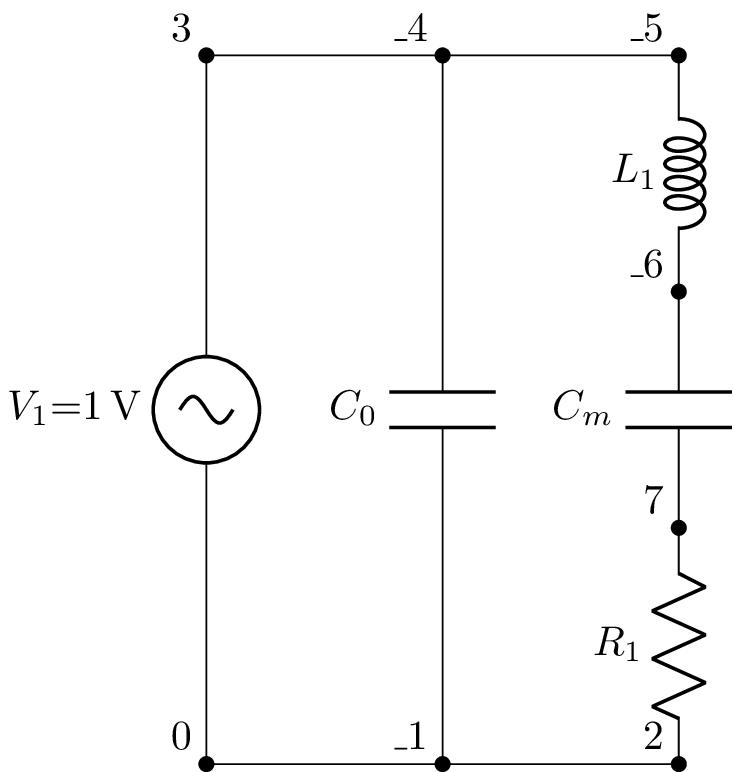

In [79]:
circuit = Circuit()

# Define the components
circuit.add('V1 3 0 ac 1; down')
circuit.add('W 0 _1; right')
circuit.add('W 3 _4; right')
circuit.add('C0 _4 _1; down')
circuit.add('W _4 _5; right')
circuit.add('W _1 2; right')
circuit.add('L1 _5 _6; down')
circuit.add('Cm _6 7; down')
circuit.add('R1 7 2; down')

# Draw the circuit
#circuit.draw(draw_nodes='connected')
#circuit.draw(draw_nodes='connections')
circuit.draw(draw_nodes='all', label_nodes='all')

In [ ]:
ckt = Circuit()

# Define the components
ckt.add('V1 3 0 ac 1; down')
ckt.add('W 0 0_1; right')
ckt.add('W 3 3_1; right')
ckt.add('Cp 3_1 0_1 .11e-14; down')
ckt.add('W 3_1 3_2; right')
ckt.add('W 0_1 0_2; right')
ckt.add('L1 3_2 _6 .5e-12; down')
ckt.add('Cm _6 _7 .35e-17; down')
ckt.add('R1 _7 0_2 3.91e4; down')

# Draw the circuit
ckt.draw(label_nodes='all')
cg = ckt.circuit_graph()
cg.cut_sets()
cg.tree()
cg.loops_by_cpt_name() 

/home/erik/anaconda3/envs/py312/lib/python3.12/site-packages/lcapy/network.py:249: UserWarning: Form is deprecated; use layout instead
  warn('Form is deprecated; use layout instead')


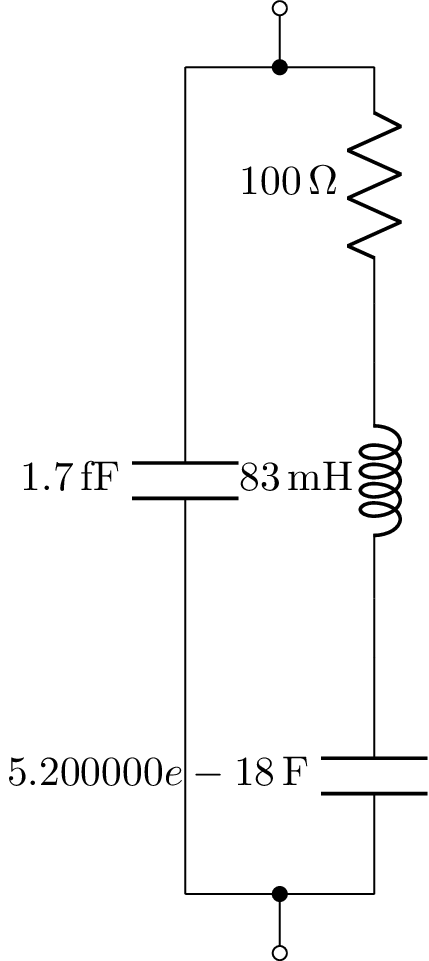

'W 1 2; right=0.25\nW 2 4; up=0.4\nW 3 5; up=0.4\nR1 4 7 100; right\nW 7 8; right=0.25\nL1 8 6 0.083; right\nW 6 9; right=0.25\nC1 9 5 5.2e-18; right\nW 2 10; down=0.4\nW 3 11; down=0.4\nC2 10 11 1.7e-15; right\nW 3 0; right=0.25'

In [4]:
ckt_net = (R(100) + L(.83e-1) +C(.52e-17)) | C(.17e-14)
#ckt_net = (R(10) + L(1e-2) +C(.17e-17)) | C(.55e-13)
#ckt_net = R(100) + L(1e-2) +C(.17e-17)
ckt_net.draw(form='vertical')
ckt_net.netlist()

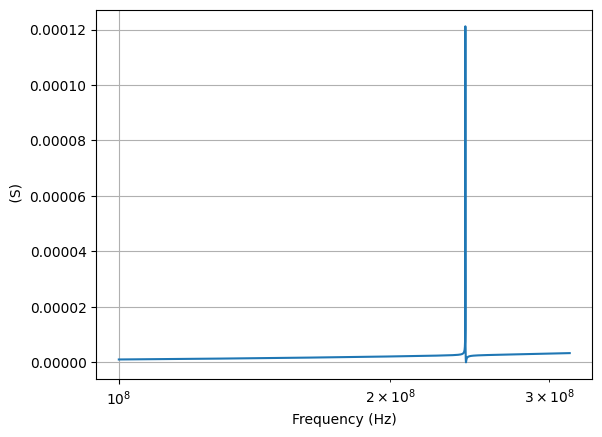

In [175]:
vf = np.logspace(8,8.5, 9000)
axes = ckt_net.Y(j2pif).magnitude.plot(vf)
#axes = ckt_net.Y(j2pif).magnitude.plot((20000,40000))
axes.set_xscale('log')
#axes.set_yscale('log')
#axes.set_ylim(-10, 100)

Text(0, 0.5, 'Admittence')

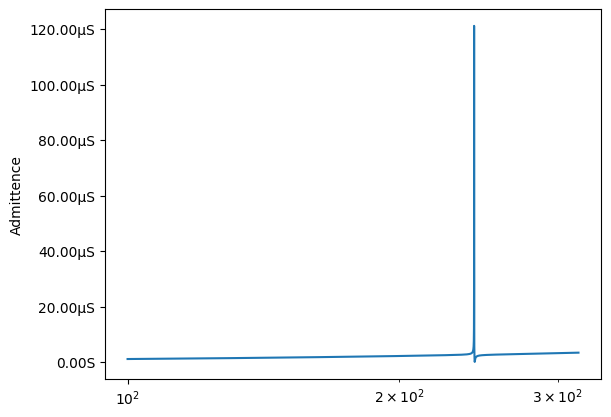

In [180]:
#vf = np.logspace(8,8.5, 9000)

fig, axes = plt.subplots(1)
formatter0 = EngFormatter(places=2, unit='MHz', sep='')
formatter_y = EngFormatter(places=2, unit='S', sep='')

#ckt_net.Y(j2pif).magnitude.plot(vf/1e6, axes=axes)
axes.plot( vf/1e6, ckt_net.Y(j2pif).magnitude.evaluate(vf))
axes.set_xscale('log')
axes.set_ylabel('Admittence')
#axes.xaxis.set_major_formatter(formatter0) 
axes.yaxis.set_major_formatter(formatter_y)

In [115]:
#shunt is a two port 
n = Shunt(ckt_net)
n.Sparams

⎡                         
⎢                         
⎢─────────────────────────
⎢     ⎛    2              
⎢Z₀⋅s⋅⎝77⋅s  + 60214000000
⎢                         
⎢                         
⎢                         
⎢─────────────────────────
⎢     ⎛    2              
⎣Z₀⋅s⋅⎝77⋅s  + 60214000000

                          
                          
──────────────────────────
                          
00000000⋅s + 4414000000000
                          
                          
                          
──────────────────────────
                          
00000000⋅s + 4414000000000

           ⎛    2         
     -Z₀⋅s⋅⎝77⋅s  + 602140
──────────────────────────
                   ⎞      
0000000000000000000⎠ + 140
                          
                   ⎛   2  
 20000000000000000⋅⎝7⋅s  +
──────────────────────────
                   ⎞      
0000000000000000000⎠ + 140

                          
0000000000000⋅s + 44140000
──────────────────────────
                 2       

In [128]:
A = ckt_net.Y(jomega).evalf(3)
A
ckt_net.Z(s).ZPK().evalf(3)
ckt_net.Z(s).standard().evalf(3)

                          
1.1e-15⋅ⅉ⋅ω + ────────────
                          
              5.0e-13⋅ⅉ⋅ω 
                          

    1                 
──────────────────────
            2.86e+17⋅ⅉ
+ 3.91e+4 - ──────────
                ω     

  9.09e+14⋅(s + 7.82e+16) 
──────────────────────────
(s + 8.8e+12)⋅(s + 7.82e+1

  
──
6)

         2                
7.0e+16⋅s  + 5.47e+33⋅s + 
──────────────────────────
      3             2     
77.0⋅s  + 6.02e+18⋅s  + 4.

        
4.0e+46 
────────
        
41e+31⋅s

In [ ]:
np.logspace?

In [133]:
type(ckt_net)

lcapy.oneport.Par

In [136]:
ckt_net.Y(j2pif).magnitude.plot

<bound method PhasorRatioDomainExpression.plot of PhasorRatioDomainAdmittance(5000000000000000*pi*sqrt(91766820250000000000000000000000000000000000000000000000000000000000000000000000000000000000*pi**2*f**2 + (539*pi**4*f**4 + 823874345000000000000000000000000000*pi**2*f**2 + 11035000000000000000000000000000000000000000000000000000000000)**2)*Abs(f)/(1225000000000000000000000000000000*pi**4*f**4 + 1872442250000000000000000000000000000000000000000000000000000000000*pi**2*f**2 + 25000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000))>

In [ ]:
H = transfer()

fv = np.logspace(-1, 3, 400)
H(j2pif).dB.plot(fv, log_scale=True)

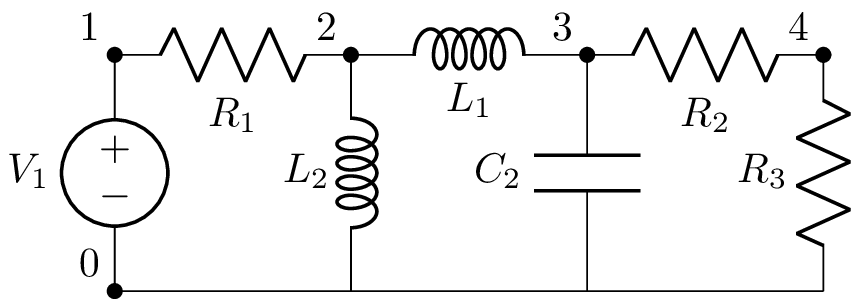

In [118]:
cct = Circuit("""
...V1 1 0; down
...R1 1 2; right
...L1 2 3; right
...R2 3 4; right
...L2 2 0_2; down
...C2 3 0_3; down
...R3 4 0_4; down
...W 0 0_2; right
...W 0_2 0_3; right
...W 0_3 0_4; right""")
cct.draw()

In [ ]:
cg = cct.circuit_graph()
cg.draw()

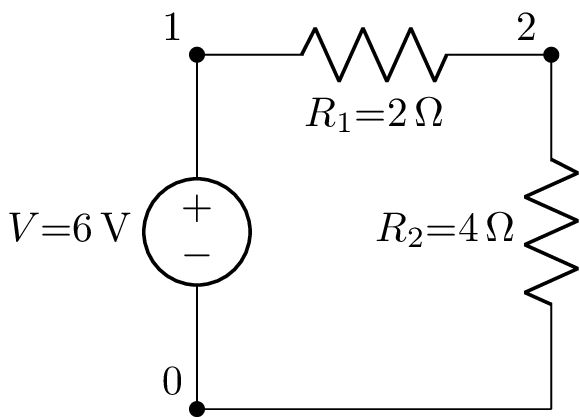

In [5]:
a = Circuit("""
V 1 0 6; down=1.5
R1 1 2 2; right=1.5
R2 2 0_2 4; down
W 0 0_2; right""")
a.draw()

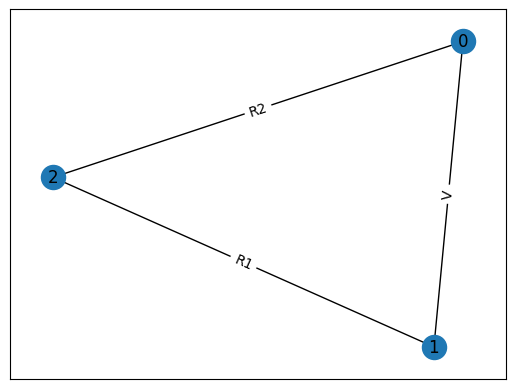

In [6]:
cg = a.circuit_graph()
cg.draw()

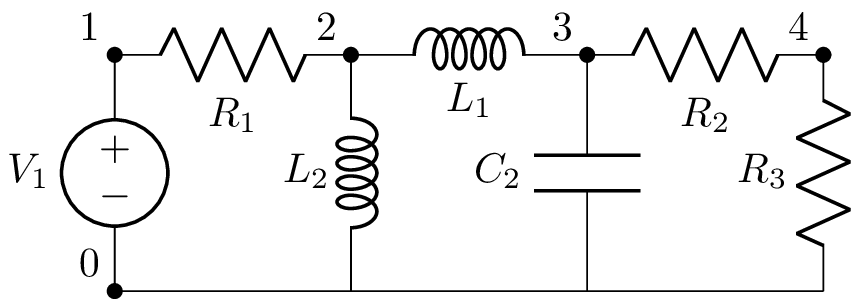

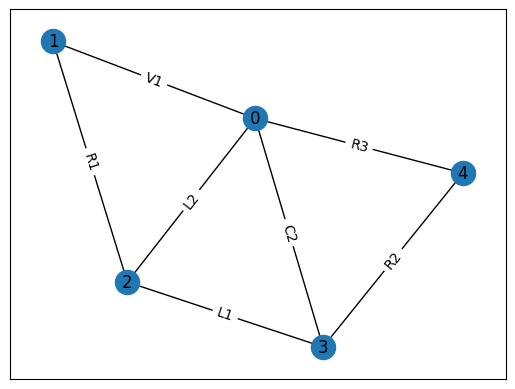

In [7]:
cct = Circuit("""
...V1 1 0; down
...R1 1 2; right
...L1 2 3; right
...R2 3 4; right
...L2 2 0_2; down
...C2 3 0_3; down
...R3 4 0_4; down
...W 0 0_2; right
...W 0_2 0_3; right
...W 0_3 0_4; right""")
cct.draw()
cg = cct.circuit_graph()
cg.draw()